# Part I - (Ford GoBike System  Data Exploration)
## by Som Patrick

## Introduction
> This document explores information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load in the dataset

In [2]:
# 201902-fordgobike-tripdata.csv
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# first five rows
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# high-level overview of data shape and composition
print(bikes.shape)
print(bikes.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


make a copy of the dataframe

In [5]:
# make a copy
bikes_copy = bikes.copy()

change datatypes to appropriate datatype 

In [6]:
# start_time                  object to datatime
# end_time                    object to datatime
# start_station_id           float64 to  string
# end_station_id             float64 to string
# bike_id                      int64 to int
# member_birth_year          float64 to float


bikes_copy = bikes_copy.astype({'start_time': 'datetime64', 'end_time': 'datetime64', 
                  'start_station_id': 'string', 'end_station_id': 'string',
                  'bike_id': 'int', 'member_birth_year': 'float'})

In [7]:
# inspect 
bikes_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  string        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  string        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int32         
 12  user_type       

check missing values

In [8]:
# check missing values
bikes_copy.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

drop missing values

In [9]:
# drop missing values
bikes_new = bikes_copy.dropna()
bikes_new

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [10]:
# confirm missing values are dropped
bikes_new.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# value counts of the start_station_name
bikes_new['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [12]:
# value counts of the start_station_id
bikes_new['start_station_id'].value_counts()

58.0     3649
67.0     3408
81.0     2952
21.0     2711
3.0      2620
         ... 
234.0       9
51.0        7
224.0       4
300.0       3
344.0       2
Name: start_station_id, Length: 329, dtype: Int64

In [13]:
# unique values of the start_station_id
bikes_new['start_station_id'].unique()

<StringArray>
[ '21.0',  '86.0', '375.0',   '7.0',  '93.0', '300.0',  '10.0',  '19.0',
 '370.0',  '44.0',
 ...
 '225.0', '303.0', '209.0', '289.0', '229.0', '301.0', '226.0', '234.0',
 '224.0',  '37.0']
Length: 329, dtype: string

check duplicates

In [14]:
# check duplicates
bikes_new.duplicated().sum()

0

In [15]:
# count of items 
bikes_new.count()

duration_sec               174952
start_time                 174952
end_time                   174952
start_station_id           174952
start_station_name         174952
start_station_latitude     174952
start_station_longitude    174952
end_station_id             174952
end_station_name           174952
end_station_latitude       174952
end_station_longitude      174952
bike_id                    174952
user_type                  174952
member_birth_year          174952
member_gender              174952
bike_share_for_all_trip    174952
dtype: int64

In [16]:
# first five rows
bikes_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [17]:
# descriptive statistics 
bikes_new.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,1659.195937,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?
 
> There are 183412 bikes in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'). 

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in the different genders and user types,basically these two.Much of my analyses and visualizations will be around these two variables
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the member_gender and user_type columns. I believe these two features would be helpful

## Univariate Exploration

I'll start by looking at the distribution of one of the main variable of interest: member_gender 

**Note:** All analyses, visualizations and observations are based on the cleaned data

### Question

How many males and females are there?

In [18]:
# shape of dataframe
bikes_new.shape

(174952, 16)

In [19]:
# value of count of the various genders
bikes_new['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

### Visualization

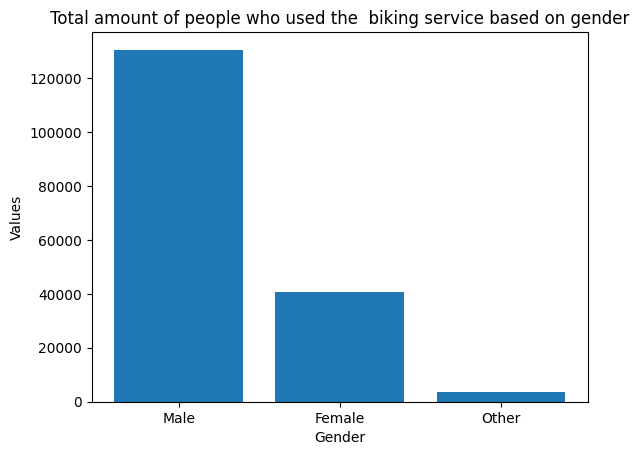

In [20]:
# let's put the respective values above into a list

gender =['Male','Female','Other']
values =[130500, 40805, 3647]


plt.bar( gender, values);
plt.title('Total amount of people who used the  biking service based on gender');
plt.xlabel('Gender');
plt.ylabel('Values');

### Observations
Out of the total number of people(174952), 130500 are males , 40805 are females and 3647 are Other.i.e consider themselves as neigher male nor female

***  Now let's proceed with the second variable of interet: user_type ***  

### Question
how many different types of users are there?

In [21]:
# value counts of the various user types
bikes_new['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [22]:
# calculate percentage of the various user types
subscriber = bikes_new['user_type'].value_counts()[0]
customer = bikes_new['user_type'].value_counts()[1]
total_users = subscriber + customer

# percentage each user type
sub_perct =  (subscriber / total_users * 100).round(2)
cus_perct = (customer / total_users * 100).round(2)

print ('percentage of subscribers:',sub_perct)
print ('percentage of customers:',cus_perct)

percentage of subscribers: 90.53
percentage of customers: 9.47


### Visualization

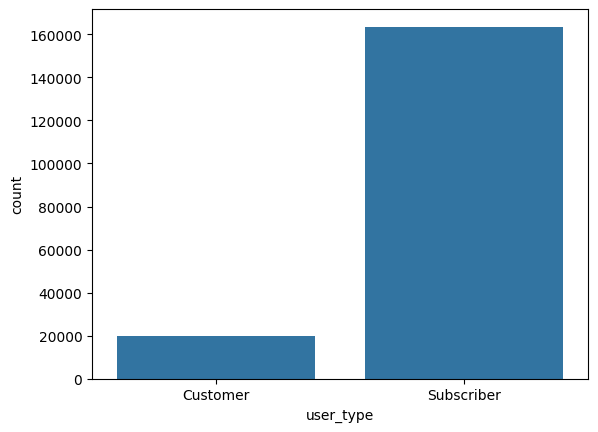

In [23]:
# seaborn plot
base_color = sns.color_palette()[0]
sns.countplot(data = bikes, x= 'user_type', color = base_color);

plot of the respective user types and their percentages

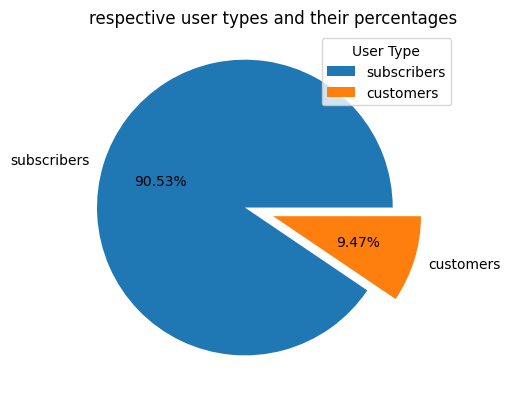

In [24]:
# plot of the respective user types and their percentages
types = [sub_perct,cus_perct]
label =['subscribers', 'customers']
myexplode = [0.2, 0]

plt.pie(types, labels = label,autopct='%1.2f%%', explode = myexplode);
plt.title('respective user types and their percentages');
plt.legend(title = "User Type");

### Observation
There are basically two type of users: Subscriber and Customer.
Below are the types of users and their respective values:
    
Subscriber :    158386;
Customer   :    16566

We can clearly see from the graph and the values that there are more Subscribers than Customers. Subscribers make up a total percentage of 90.53% while Customers are a total of 9.47%.

### Question 
how many shared their bike during all the trip and how many did not?

In [25]:
# value counts
bikes_new.bike_share_for_all_trip.value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

### Visualization



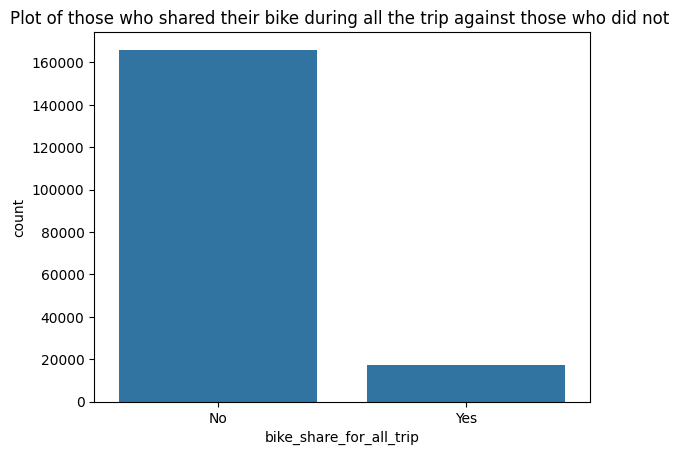

In [26]:
# bar plot
base_color = sns.color_palette()[0]
sns.countplot(data = bikes, x= 'bike_share_for_all_trip', color = base_color);
plt.title('Plot of those who shared their bike during all the trip against those who did not ');

### Observation
Very few people shared their bike during all the trip about 17346 of them whiles the  majority did not which makes up a total of 157606 people.

### Question
how long did the minimum, average and maximum trip take(in seconds) ?

In [27]:
# lets get the descriptive statistics of the duration_sec column
bikes_new.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [28]:
# lets round to the nearest whole number
bikes_new.duration_sec.describe().round()

count    174952.0
mean        704.0
std        1642.0
min          61.0
25%         323.0
50%         510.0
75%         789.0
max       84548.0
Name: duration_sec, dtype: float64

In [29]:
# get and print the values of interest 

min_trip = bikes_new.duration_sec.min()
avg_trip = bikes_new.duration_sec.mean().round()
max_trip = bikes_new.duration_sec.max()
print('minimum trip took:', min_trip, 'sec')
print('average trip took:', avg_trip, 'sec')
print('maximum trip took:', max_trip, 'sec')

minimum trip took: 61 sec
average trip took: 704.0 sec
maximum trip took: 84548 sec


### Visualization

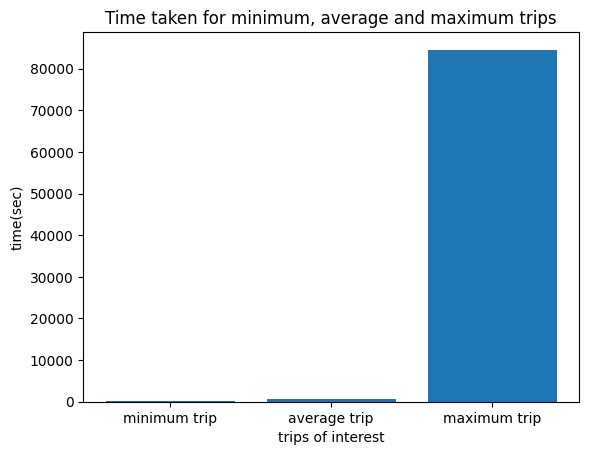

In [30]:
# let's put the respective values above into a list

trip =['minimum trip','average trip','maximum trip']
time =[61, 704, 84548]


plt.bar( trip, time);
plt.title('Time taken for minimum, average and maximum trips');
plt.xlabel('trips of interest');
plt.ylabel('time(sec)');

### 0bservation
The minimum trip took about 61 seconds, average trip took about 704 seconds and the maximum trip took about 84548 seconds.

### Question
How many people started at the same station?

In [31]:
# value count of the start_station_name column
bikes_new['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

since we can not plot all these values, let's get the first five output(names) of the above operation

In [32]:
#  let's get the first five output(names) of the above operation
df_bk = bikes_new['start_station_name'].value_counts()[0:5]
df_bk

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

In [33]:
# index
station_names = df_bk.index
station_names

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)'],
      dtype='object')

### Visualization

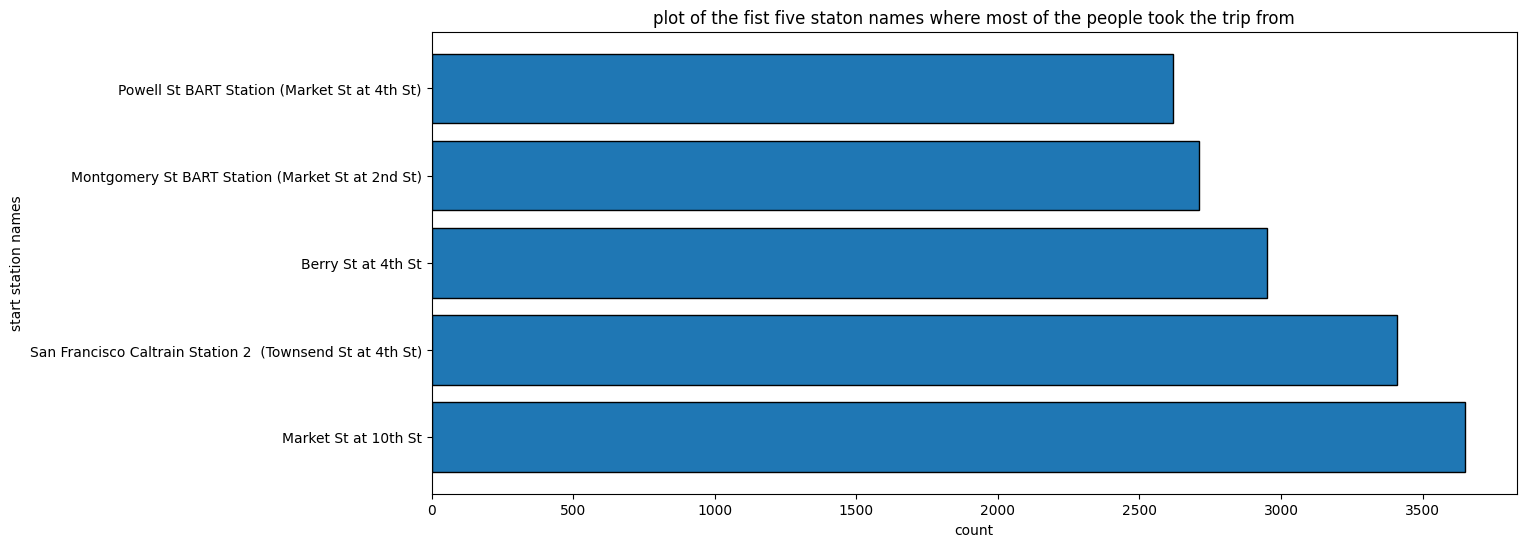

In [34]:
# function 
def my_function():
 df_bk.plot.barh(edgecolor='black', figsize=[14,6], rot = 0, width = 0.8);

 plt.title('plot of the fist five staton names where most of the people took the trip from');
 plt.xlabel('count');
 plt.ylabel('start station names'); 

my_function()


<!-- ### Visualization -->

<!-- # # let's put the respective values above into a list

# start_station_names =['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St',
#        'Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)']
# values =[3649, 3408, 2952,2711, 2620]


# plt.barh(start_station_names, values);
# plt.title('plot of the fist five staton names where most of the people took the trip from');
# plt.xlabel('count');
# plt.ylabel('start station names'); -->

### Observation

Over 3500 people started their trip from Market St at 10th St,San Francisco Caltrain Station 2  (Townsend St at 4th St) had  3408 people starting their trip from there, 2952 also started from Berry St at 4th St,Montgomery St BART Station (Market St at 2nd St) had 2711 people starting their trip from there,and lastly, 2620 people started from Powell St BART Station (Market St at 4th St) 

### Question
let's look at the distribution of the member_birth_year column

### Visualization

C:\Users\user\AppData\Local\Temp\ipykernel_14804\2537319165.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bikes_new['member_birth_year'], kde= True );


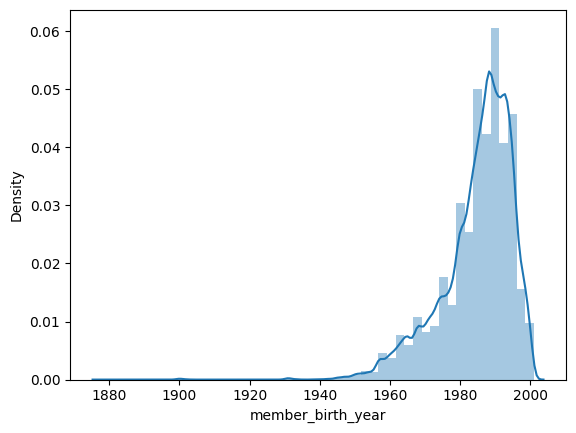

In [35]:
# histogram
sns.distplot(bikes_new['member_birth_year'], kde= True );

### Observation

The member_birth_year column appears to be left-skewed (negatively skewed) with more values between 1960 and 2000, with the peak year somewhere between 1980 and 2000 and some extreme values from 1880 to 1940

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The data upon which all analyses and visualizations were drawn upon were cleaned so there wasn't any unusual plots of any kind thereof. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data upon which all analyses and visualizations were drawn upon were cleaned so there wasn't any unusual plots of any kind thereof. I cleaned the data in order to get  trustworthy analyses and visualizations. 

## Bivariate Exploration

### Question
what are the respective user types for the various gender categories? What are the numbers?

In [36]:
# count
bikes_new.groupby(['member_gender','user_type'])["user_type"].count()

member_gender  user_type 
Female         Customer        4623
               Subscriber     36182
Male           Customer       11493
               Subscriber    119007
Other          Customer         450
               Subscriber      3197
Name: user_type, dtype: int64

### Visualization

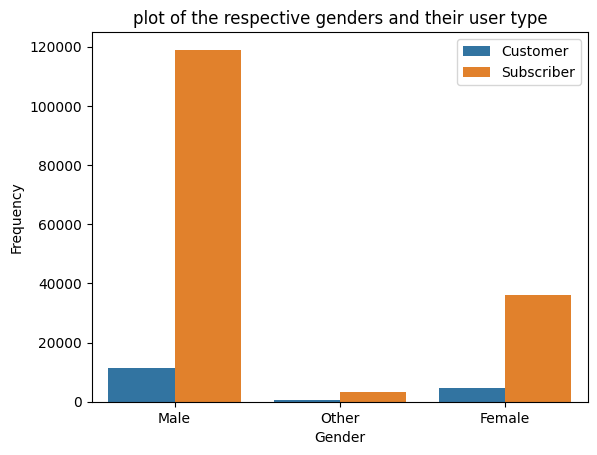

In [37]:
# plot

sns.countplot(data = bikes_new, x= 'member_gender', hue='user_type')

plt.title('plot of the respective genders and their user type');
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.legend();

<!-- # put the respective genders into a list
gender =['female','male', 'other']
xposition = np.arange(len(gender))

# put the respective values into a list
customers = [4623,11493,450]
subscribers = [36182,119007,3197]

plt.bar(xposition-0.2,customers, width=0.4, label= 'customer');
plt.bar(xposition+0.2,subscribers, width=0.4, label= 'subscriber');

plt.xticks(xposition, gender);
plt.title('plot of the respective genders and their user type');
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.legend(); -->

### Observation 

Out of a total number  of  40805 females, 4623 of them are customers and 36182 are subscribers.Also 11493 and 119007 are males customers and subscribers respectively. Lastly, 3647 people are categorized as other genders, with 450 of them being customers and 3197 being subscribers.

### Question
Among the available genders, which of them shared their trip the most and whcih did the least? How many? 

In [38]:
# groupby bike_share_for_all_trip
bikes_new.groupby(['bike_share_for_all_trip'])["member_gender"].count()

bike_share_for_all_trip
No     157606
Yes     17346
Name: member_gender, dtype: int64

In [39]:
# groupby member_gender and bike_share_for_all_trip
bikes_new.groupby(['member_gender','bike_share_for_all_trip'])["bike_share_for_all_trip"].count()

member_gender  bike_share_for_all_trip
Female         No                          37211
               Yes                          3594
Male           No                         117396
               Yes                         13104
Other          No                           2999
               Yes                           648
Name: bike_share_for_all_trip, dtype: int64

### Visualization

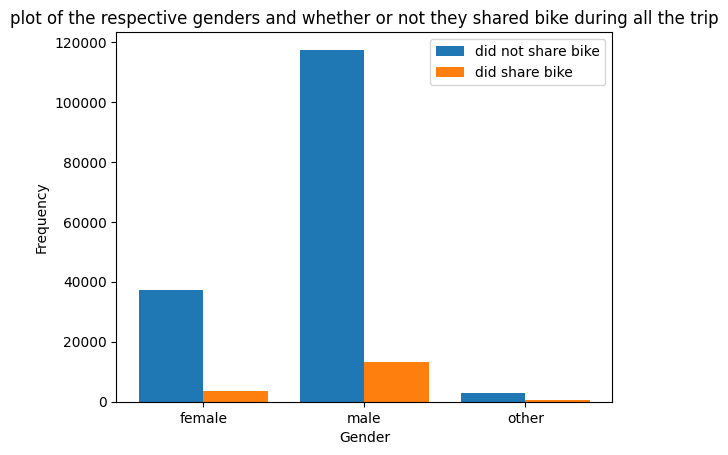

In [40]:
# put the respective genders into a list
gender =['female','male', 'other']
xposition = np.arange(len(gender))

# put the respective values into a list
no = [37211,117396,2999]
yes = [3594,13104,648]

plt.bar(xposition-0.2,no, width=0.4, label= 'did not share bike');
plt.bar(xposition+0.2,yes, width=0.4, label= 'did share bike');

plt.xticks(xposition, gender);
plt.title('plot of the respective genders and whether or not they shared bike during all the trip');
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.legend();

### Observation

We can clearly see that most of them among the various genders did not share their bike during all the trip.More males did not share as compared to females and 'other' gender. Moreover, those who shared their bike are very few with males making up a number of 13104(the majority), followed by females making up a total of 3594 with the least being those identified as 'other' with a total number of 648.

### Main Question 

How many people in the respective genders started their trip from Market St at 10th St,San Francisco Caltrain Station 2  (Townsend St at 4th St),Berry St at 4th St,Montgomery St BART Station (Market St at 2nd St),Powell St BART Station (Market St at 4th St)?

**Note:** These questions would be answered individually from station names

<!-- # def myCountPlot(df, xVar, query= None, color= 'steelblue',order ='None', title =''):


# # data prep
#  if query:
#     data = df.query(query)

#  else:
#     data = df
    
#  # set plot dimension 
#  plt.figure(figsize=[14,6])

#  # plot
#  sns.countplot(data = data , x =xVar, edgecolor = 'black', color = color, order = order);

#  xVar = xVar.replace('_', ' ')

#  # add title and format it
#  plt.title(f''' Distribution of {xVar} {title} ''' .title(), fontsize=14, weight = 'bold')

#  # add xlabel and format it
#  plt.xlabel(xVar.title(), fontsize=10, weight = 'bold')

#  # add ylabel and format it
#  plt.ylabel('Frequency'.title(), fontsize=10, weight = 'bold')

 -->

<!-- # for name in station_names:
#     query = f'start_station_name=="{name}"'

#   # call plot function
#     myCountPlot(bikes_new,'member_gender', query = query, title =f':{name}') -->

### Question 
How many people in their respective genders started their trip from Market St at 10th St?

females who started their trip from Market St at 10th St

In [41]:
# females who started their trip from Market St at 10th St
females_from_market = (bikes_new ['member_gender'] == 'Female') & (bikes_new['start_station_name'] == 'Market St at 10th St')
females_from_market.sum()

876

males who started their trip from Market St at 10th St

In [42]:
# males who started their trip from Market St at 10th St
males_from_market = (bikes_new ['member_gender'] == 'Male') & (bikes_new['start_station_name'] == 'Market St at 10th St')
males_from_market.sum()

2700

Other genders who started their trip from Market St at 10th St

In [43]:
# Other genders who started their trip from Market St at 10th St
other_from_market = (bikes_new ['member_gender'] == 'Other') & (bikes_new['start_station_name'] == 'Market St at 10th St')
other_from_market.sum()

73

### Visualization

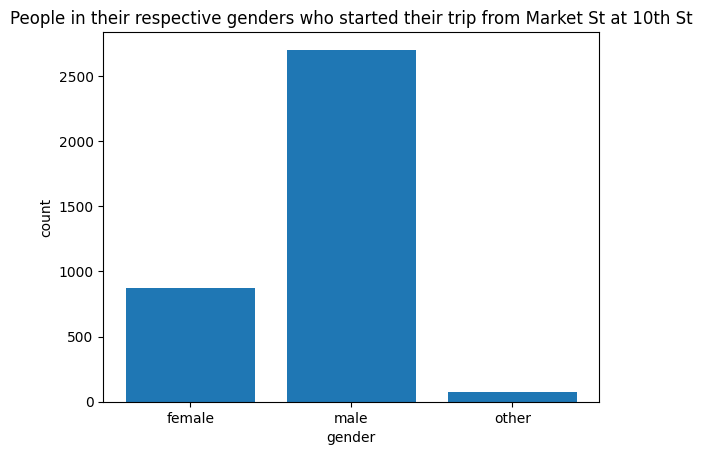

In [44]:
# let's put the respective values above into a list

gender =['female','male','other']
count =[876, 2700, 73]


plt.bar(gender,count);
plt.title('People in their respective genders who started their trip from Market St at 10th St');
plt.xlabel('gender');
plt.ylabel('count');

### Observation 
A total of 3649 people started their trip from Market St at 10th St among which  876 are females , 2700 are males,and  73 of them identify as other gender.

### Question
How many people in their respective genders started their trip from San Francisco Caltrain Station 2  (Townsend St at 4th St)?

females who started their trip from San Francisco Caltrain Station 2 (Townsend St at 4th St)

In [45]:
# females who started their trip from San Francisco Caltrain Station 2 (Townsend St at 4th St)
females_from_san_frans = (bikes_new ['member_gender'] == 'Female') & (bikes_new['start_station_name'] == 'San Francisco Caltrain Station 2  (Townsend St at 4th St)')
females_from_san_frans.sum()

718

males who started their trip from San Francisco Caltrain Station 2 (Townsend St at 4th St)

In [46]:
# males who started their trip from San Francisco Caltrain Station 2 (Townsend St at 4th St)
males_from_san_frans = (bikes_new ['member_gender'] == 'Male') & (bikes_new['start_station_name'] == 'San Francisco Caltrain Station 2  (Townsend St at 4th St)')
males_from_san_frans.sum()

2652

other who started their trip from San Francisco Caltrain Station 2 (Townsend St at 4th St)

In [47]:
# other who started their trip from San Francisco Caltrain Station 2 (Townsend St at 4th St)
other_from_san_frans = (bikes_new ['member_gender'] == 'Other') & (bikes_new['start_station_name'] == 'San Francisco Caltrain Station 2  (Townsend St at 4th St)')
other_from_san_frans.sum()

38

### Visualization

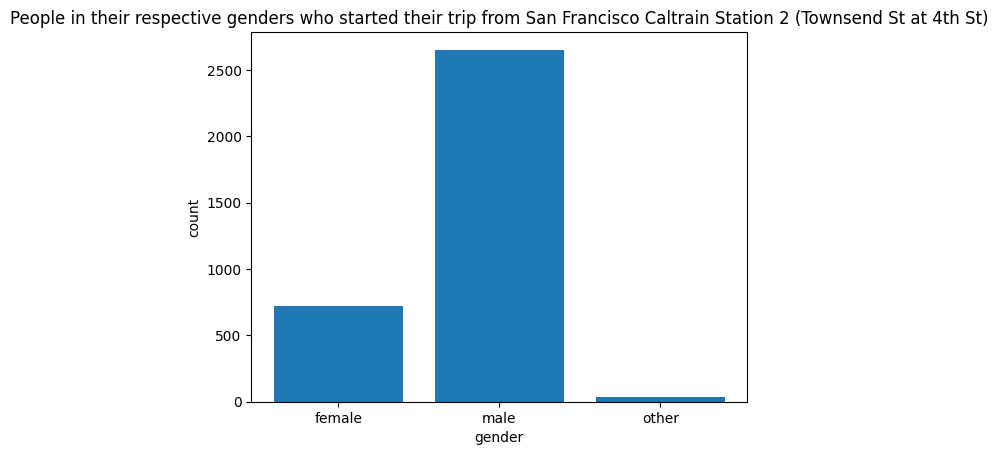

In [48]:
# let's put the respective values above into a list

gender =['female','male','other']
count =[718, 2652, 38]


plt.bar(gender,count);
plt.title('People in their respective genders who started their trip from San Francisco Caltrain Station 2 (Townsend St at 4th St)');
plt.xlabel('gender');
plt.ylabel('count');

### Observation
A total of 3408 people started their trip from San Francisco Caltrain Station 2 (Townsend St at 4th St) among which  718 are females , 2652 are males,and 38 of them identify as other gender.

### Question
How many people in their respective genders started their trip from Berry St at 4th St?

females who started their trip from Berry St at 4th St

In [49]:
# females who started their trip from Berry St at 4th St

females_from_berry = (bikes_new ['member_gender'] == 'Female') & (bikes_new['start_station_name'] == 'Berry St at 4th St')
females_from_berry.sum()

815

males who started their trip from Berry St at 4th St

In [50]:
# males who started their trip from Berry St at 4th St

males_from_berry = (bikes_new ['member_gender'] == 'Male') & (bikes_new['start_station_name'] == 'Berry St at 4th St')
males_from_berry.sum()

2095

In [51]:
# males who started their trip from Berry St at 4th St

other_from_berry = (bikes_new ['member_gender'] == 'Other') & (bikes_new['start_station_name'] == 'Berry St at 4th St')
other_from_berry.sum()

42

### Visualization

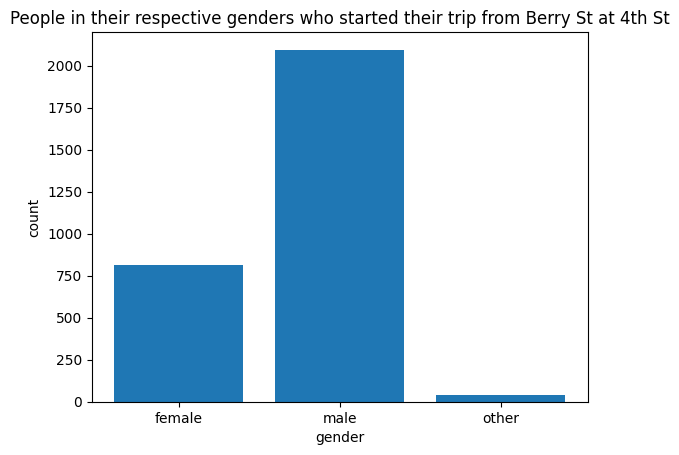

In [52]:
# let's put the respective values above into a list

gender =['female','male','other']
count =[815, 2095, 42]


plt.bar(gender,count);
plt.title('People in their respective genders who started their trip from Berry St at 4th St');
plt.xlabel('gender');
plt.ylabel('count');

### Observation
A total of 2952 people started their trip from Berry St at 4th St among which 815 are females ,2095 are males,and 42 of them identify as other gender.

### Question
How many people in their respective genders started their trip from Montgomery St BART Station (Market St at 2nd St)?

females who started their trip from Montgomery St BART Station (Market St at 2nd St)

In [53]:
# females who started their trip from Montgomery St BART Station (Market St at 2nd St)

females_from_mont = (bikes_new ['member_gender'] == 'Female') & (bikes_new['start_station_name'] == 'Montgomery St BART Station (Market St at 2nd St)')
females_from_mont.sum()

473

males who started their trip from Montgomery St BART Station (Market St at 2nd St)

In [54]:
# males who started their trip from Montgomery St BART Station (Market St at 2nd St)

males_from_mont = (bikes_new ['member_gender'] == 'Male') & (bikes_new['start_station_name'] == 'Montgomery St BART Station (Market St at 2nd St)')
males_from_mont.sum()

2170

other who started their trip from Montgomery St BART Station (Market St at 2nd St)

In [55]:
# other who started their trip from Montgomery St BART Station (Market St at 2nd St)

other_from_mont = (bikes_new['member_gender'] == 'Other') & (bikes_new['start_station_name'] == 'Montgomery St BART Station (Market St at 2nd St)')
other_from_mont.sum()

68

### Visualization

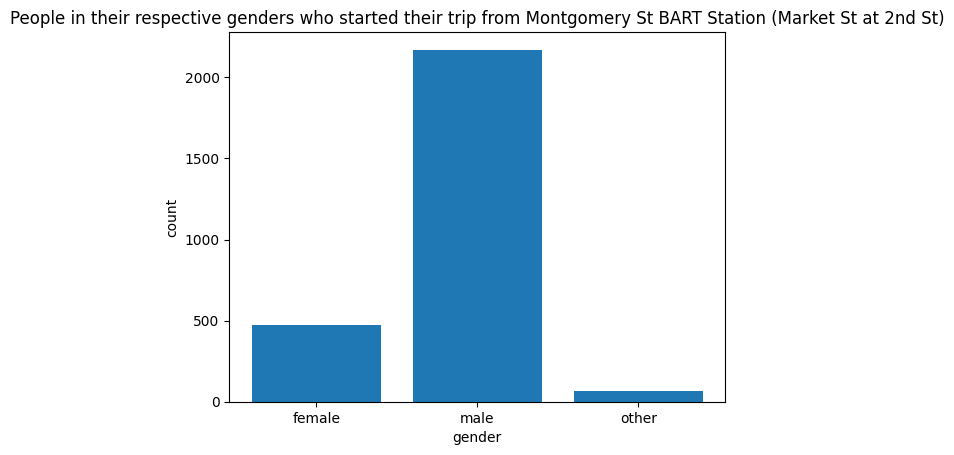

In [56]:
# let's put the respective values above into a list

gender =['female','male','other']
count =[473, 2170, 68]


plt.bar(gender,count);
plt.title('People in their respective genders who started their trip from Montgomery St BART Station (Market St at 2nd St)');
plt.xlabel('gender');
plt.ylabel('count');

### Observation
A total of 2711 people started their trip from Montgomery St BART Station (Market St at 2nd St) among which 473 are females ,2170 are males,and 68 of them identify as other gender

### Question
How many people in their respective genders started their trip from Powell St BART Station (Market St at 4th St)?

females who started their trip from Powell St BART Station (Market St at 4th St)

In [57]:
# females who started their trip from Powell St BART Station (Market St at 4th St)

females_from_powell = (bikes_new ['member_gender'] == 'Female') & (bikes_new['start_station_name'] == 'Powell St BART Station (Market St at 4th St)')
females_from_powell.sum()

567

males who started their trip from Powell St BART Station (Market St at 4th St)

In [58]:
# males who started their trip from Powell St BART Station (Market St at 4th St)

males_from_powell = (bikes_new ['member_gender'] == 'Male') & (bikes_new['start_station_name'] == 'Powell St BART Station (Market St at 4th St)')
males_from_powell.sum()

2009

other who started their trip from Powell St BART Station (Market St at 4th St)

In [59]:
# other who started their trip from Powell St BART Station (Market St at 4th St)

other_from_powell = (bikes_new ['member_gender'] == 'Other') & (bikes_new['start_station_name'] == 'Powell St BART Station (Market St at 4th St)')
other_from_powell.sum()

44

### Visualization

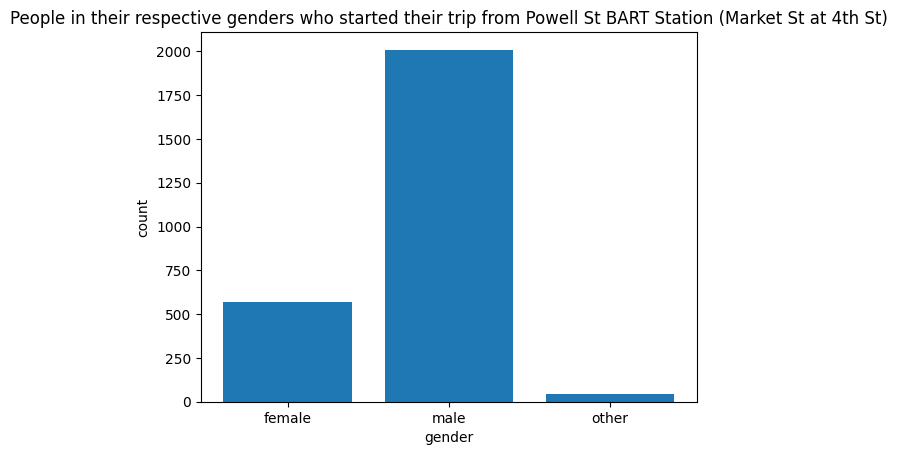

In [60]:
# let's put the respective values above into a list

gender =['female','male','other']
count =[567, 2009, 44]


plt.bar(gender,count);
plt.title('People in their respective genders who started their trip from Powell St BART Station (Market St at 4th St)');
plt.xlabel('gender');
plt.ylabel('count');

### Observation
A total of 2620 people started their trip from Montgomery St BART Station (Market St at 2nd St) among which 567 are females ,2009 are males,and 44 of them identify as other gender 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My analyses didn't not take into consideration any relationship sort of so I can not speak on that

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  My analyses didn't not take into consideration any relationship sort of so I can not speak on that. But generally, it was quite an interesting analyses.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

let's explore these features: member_gender, duration_sec and user_type

### Visualization

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


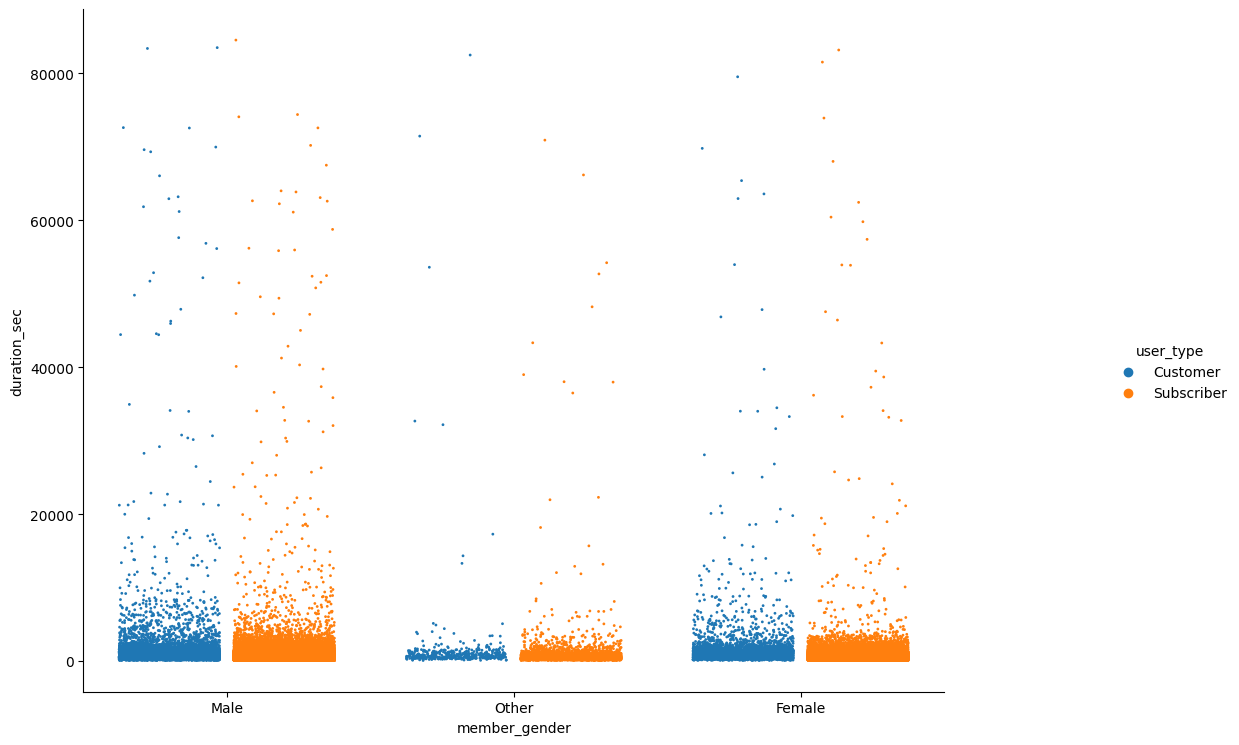

In [61]:
# categorical plot
g = sns.catplot(data=bikes_new , x='member_gender',  y ='duration_sec', hue='user_type', jitter = 0.35, dodge = True, size = 2);

# set plot dimension 
g.fig.set_size_inches(14, 8);

<!-- # # Note: Because that visualization is dominated by outliers (i.e. is mostly white/empty space), you would include an additional visualization will the outliers excluded:

# # categorical plot
# g = sns.catplot(data=bikes_new.query('duration_sec < duration_sec.quantile(0.99)') , x='member_gender',  y ='duration_sec', hue='user_type', jitter = 0.35, dodge = True, size = 2);

# # set plot dimension 
# g.fig.set_size_inches(14, 8); -->

<!-- # # categorical plot
# sns.catplot(data=bikes_new , x='member_gender',  y ='duration_sec', hue='user_type', jitter = True) -->

<!-- # b1 = bikes_new[bikes_new['duration_sec'] < 5000]
# b1.shape  -->

<!-- # b2 = bikes_new[bikes_new['duration_sec'] > 5000]
# b2.shape -->

<!-- sns.catplot(data=b1 , x ='member_gender',  y ='duration_sec', hue = 'user_type', kind="violin",) -->

### Observation 

We can observe from the plot above that, a large number of males(both subscribers and customers) bike trips are accumulated around 0 second and the 20000 seconds threshold similarly as the females.For both males and females, the longest trip was taken by a subscriber. Howerver, for the other gender, the longest trip was taken by a customer.

<!-- # sns.catplot(data=bikes_new , x ='member_gender',  y ='duration_sec' , kind="violin", inner=None)
# sns.swarmplot( data=bikes_new , x ='member_gender',  y ='duration_sec',  color="k", size=3, ) -->

<!-- # g = sns.catplot(data=bikes_new , x ='member_gender',  y ='duration_sec' , kind="violin", inner=None)
# sns.swarmplot( data=bikes_new , x ='member_gender',  y ='duration_sec',  color="k", size=3, ax=g.ax) -->

<!-- ### Observation 
From the above plot, we could see that though majority of the observations are are accumulated around 0 second and the 20000 seconds threshold, for males, most are actaully around and below the 10000 seconds threshold similarly for the 'other' gender. Only a few people's trip lasted above the 80000 seconds threshold for all the three gender categories. -->

### Question 

let's explore these features: member_gender, member_birth_year and bike_share_for_all_trip

### Visualization

In [62]:
# set plot style 
sns.set_style('whitegrid')

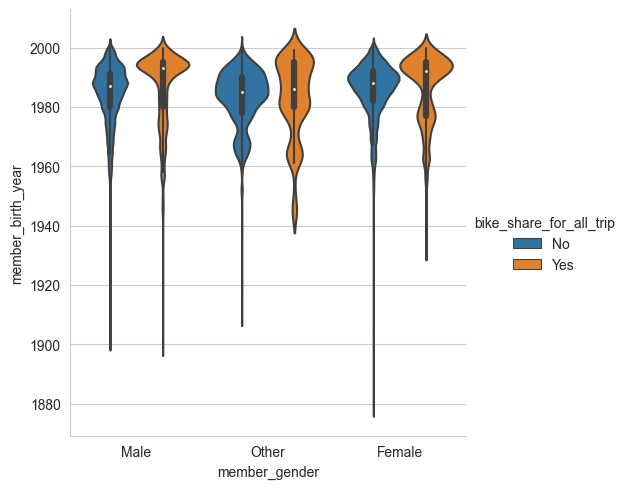

In [63]:
# bike_share_for_all_trip

# kind="violin"
sns.catplot(data=bikes_new , x='member_gender',  y ='member_birth_year', hue= 'bike_share_for_all_trip', kind="violin", split =False,)

let's plot a similar plot of the above but
set inner ='quartiles'

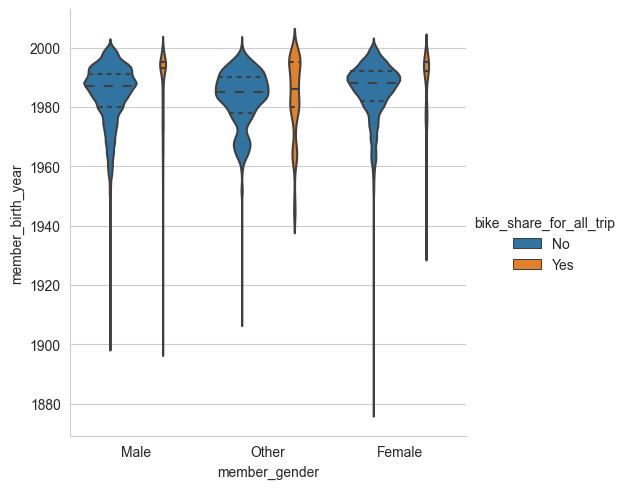

In [64]:
# bike_share_for_all_trip

# kind="violin"
sns.catplot(data=bikes_new , x='member_gender',  y ='member_birth_year', hue= 'bike_share_for_all_trip', kind="violin", split =False, scale = 'count', inner ='quartiles')

### Observation
From the first plot,
the box plot elements show the median age for those who shared their bike during all the trip are fairly above those that didn't.

The shape of the distribution (wide in the middle) indicates that most of the values are highly concentrated around the median.

From the second plot we can see that the interquartile range  for the year is roughly  between 1980 and 2000 for those who didn't share their bikes during all the trip.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My analyses didn't not take into consideration any relationship sort of so I can not speak on that.

### Were there any interesting or surprising interactions between features?

> Well, per my analyses, there appears to be more subscribers than customers of which the majority were males.I wouldn't say that was kind of a surprise because generally  males are more inclined or uses or ride bikes even in real life so most of them are likely to subscribe to the biking service.

## Conclusions
> There are basically three categories of gender in the dataset: Female, male and other. Males makes up a larger part, followed by females and the least being other gender.This is to say that males used the bike service the most.Also there are two user types consisting of customers and subscribers. Majority of the people who used the service were subscribers.